In [3]:
import pandas as pd 
data=pd.read_csv("olist_customers_dataset.csv")

In [4]:
data.head()
data.info()
data.describe( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


## 결측치 보기  0으로 깨끗히 정제된 데이터라 판단됨 

In [5]:
data.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
data['customer_unique_id'].duplicated().sum()

np.int64(3345)

## 상위도시별 고객수 

상위 10개 도시별 고객 수:
                    city  customer_count
0              sao paulo           15540
1         rio de janeiro            6882
2         belo horizonte            2773
3               brasilia            2131
4               curitiba            1521
5               campinas            1444
6           porto alegre            1379
7               salvador            1245
8              guarulhos            1189
9  sao bernardo do campo             938
------------------------------


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41576\3777946088.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.values, y=top_10_cities.index, palette='viridis')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41576\3777946088.py:31: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41576\3777946088.py:31: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41576\3777946088.py:31: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_41576\3777946088.py:31: UserWarning: Glyph 4

그래프가 'customer_distribution.png' 파일로 저장되었습니다.


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPytho

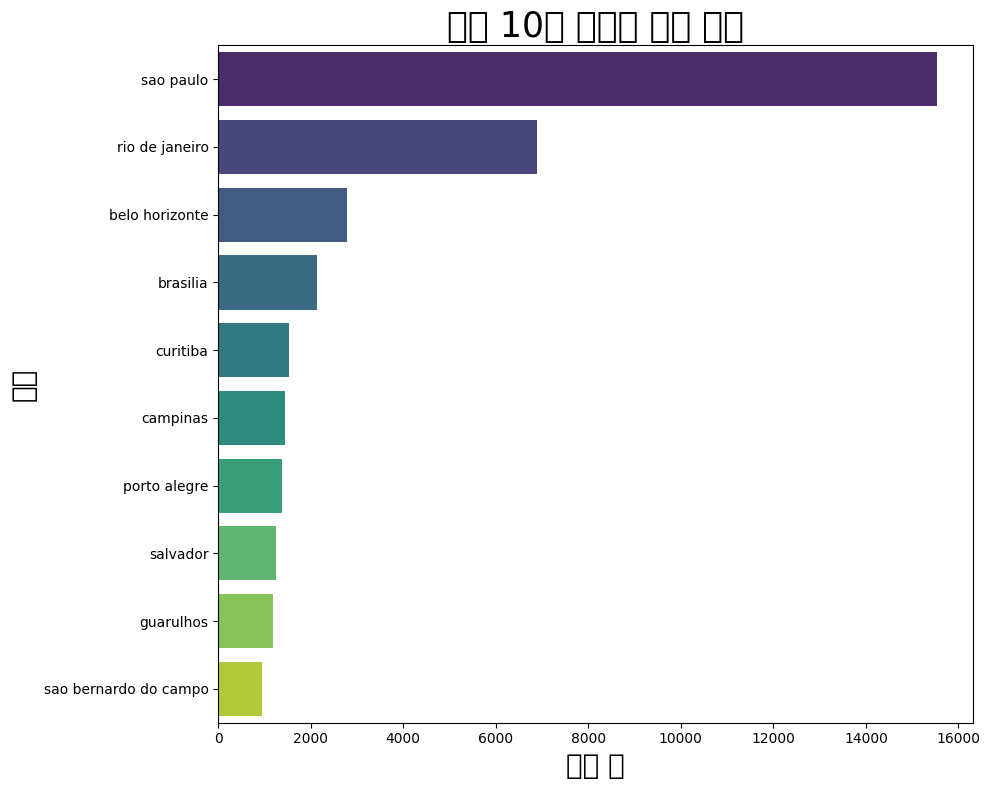

In [ ]:
data['customer_unique_id'].duplicated().sum()

 쌍파울로 가 왜 고객이 많은가?

 브라질 에서 수도라 인구가 밀접되어있는가? 

 아님 우리가 마케팅을 잘한걸까?

 우리의 상품이 현지화 전략에 잘먹힌걸까?

## 침투율

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 인구 대비 고객 비율(%) 계산
analysis_df['penetration_rate'] = (analysis_df['customer_count'] / analysis_df['population']) * 100

# 침투율을 기준으로 데이터 정렬
analysis_df_sorted = analysis_df.sort_values(by='penetration_rate', ascending=False)

# 침투율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=analysis_df_sorted['city'], y=analysis_df_sorted['penetration_rate'], palette='Blues_d')
plt.title('상위 10개 도시별 고객 침투율 (%)')
plt.xlabel('도시')
plt.ylabel('고객 침투율 (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(analysis_df_sorted)

NameError: name 'analysis_df' is not defined

In [ ]:
# 'customer_city' 컬럼을 기준으로 그룹화하고, 각 그룹의 크기를 계산합니다.
city_counts = df.groupby('customer_city').size()

# 결과를 내림차순으로 정렬하여 고객 수가 많은 도시부터 확인합니다.
sorted_city_counts = city_counts.sort_values(ascending=False)

# 상위 10개 도시의 고객 수를 표로 출력
print(sorted_city_counts.head(10).to_string())

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938


## 외부데이터 분석 인구도시 (IBGE)

 쌍파울로우 가 인구가 높아서 높은건가 그걸알기위해 상위도시를 분석하자 


그것을 통해 진짜 쌍파울로우가 침투공략하기 좋은지를 보기위해 

In [ ]:
import pandas as pd

# 1. 고객 데이터 로드 및 도시별 고객 수 집계
# 실제 olist_customers_dataset.csv 파일을 로드합니다.
df_customers = pd.read_csv('olist_customers_dataset.csv')

# 고객 도시 이름 전처리 (소문자, 공백 제거 등)
df_customers['customer_city'] = df_customers['customer_city'].str.lower().str.strip()

# 도시별 고객 수 집계 (상위 30개만 분석 대상)
city_customer_counts = df_customers['customer_city'].value_counts().head(30)

# 2. 제공된 인구 데이터를 딕셔너리로 변환
population_data = {
    'sao paulo': 11451999, 'rio de janeiro': 6211223, 'brasilia': 2817381,
    'fortaleza': 2428708, 'salvador': 2417678, 'belo horizonte': 2315560,
    'manaus': 2063689, 'curitiba': 1773718, 'recife': 1488920,
    'goiania': 1437366, 'porto alegre': 1332845, 'belem': 1303403,
    'guarulhos': 1291771, 'campinas': 1139047, 'sao luis': 1037775,
    'maceio': 957916, 'campo grande': 898100, 'teresina': 866300,
    'joao pessoa': 833932, 'sao bernardo do campo': 810729,
    'duque de caxias': 808161, 'natal': 751300, 'santo andre': 748919,
    'osasco': 728615, 'sorocaba': 723682, 'uberlandia': 713224,
    'ribeirao preto': 698642, 'sao jose dos campos': 697054,
    'cuiaba': 650877, 'aracaju': 602757, 'florianopolis': 537211,
    'niteroi': 481749, 'sao jose do rio preto': 480393,
    'vila velha': 467722, 'porto velho': 460434, 'mogi das cruzes': 451505,
    'jundiai': 443221, 'macapa': 442933, 'campina grande': 419379,
    'santos': 418608, 'maua': 418261, 'boa vista': 413486,
    'anapolis': 398869, 'diadema': 393237, 'carapicuiba': 386984,
    'bauru': 379146, 'itaquaquecetuba': 369275, 'rio branco': 364756,
    'blumenau': 361261, 'franca': 352536, 'praia grande': 349935,
    'uberaba': 337836, 'sao vicente': 329911, 'barueri': 316473,
    'taubate': 310739, 'palmas': 302692, 'limeira': 291869,
    'guaruja': 287634, 'foz do iguacu': 285415, 'sumare': 279545,
    'petropolis': 278881, 'cotia': 274413, 'taboao da serra': 273542,
    'maraba': 266533, 'indaiatuba': 255748, 'sao carlos': 254857,
    'embudas artes': 250691, 'araraquara': 242228, 'jacarei': 240275,
    'marilia': 237627, 'americana': 237240, 'hortolandia': 236641,
    'itapevi': 232297, 'presidente prudente': 225668, 'cabo frio': 222161,
    'cabo de santo agostinho': 203440, 'sobral': 203023, 'rio claro': 201418,
    'aracatuba': 200124, 'cachoeiro de itapemirim': 185786,
    'santa barbara d oeste': 183347, 'ferraz de vasconcelos': 179198,
    'braganca paulista': 176811, 'itu': 168240, 'sao caetano do sul': 165655,
    'pindamonhangaba': 165428, 'francisco morato': 165139,
    'lages': 164981, 'patos de minas': 159235, 'atibaia': 158647,
    'itapecerica da serra': 158522, 'itapetininga': 157790,
    'santana de parnaiba': 154105, 'mogi guacu': 153658,
    'botucatu': 145155, 'franco da rocha': 144849,
    'caraguatatuba': 134873, 'salto': 134319, 'jau': 133497,
    'santa cruz do sul': 133230
}

# 3. 고객 수와 인구 데이터를 합치기 위한 DataFrame 생성
analysis_df = pd.DataFrame(city_customer_counts).reset_index()
analysis_df.columns = ['city', 'customer_count']

# 4. 인구 데이터를 맵핑하여 새로운 'population' 컬럼 추가
analysis_df['population'] = analysis_df['city'].map(population_data)

# 5. 고객 침투율 계산 (인구수가 있는 도시만)
analysis_df['customer_penetration_rate'] = (analysis_df['customer_count'] / analysis_df['population']) * 100

# 6. 인구수가 없는 도시는 제거하고, 침투율 기준으로 내림차순 정렬
analysis_df = analysis_df.dropna(subset=['population'])
analysis_df_sorted = analysis_df.sort_values(by='customer_penetration_rate', ascending=False)

# 7. 최종 결과 출력
print(analysis_df_sorted.to_string())

                     city  customer_count  population  customer_penetration_rate
10                niteroi             849    481749.0                   0.176233
13                 santos             713    418608.0                   0.170326
24                barueri             433    316473.0                   0.136821
0               sao paulo           15540  11451999.0                   0.135697
20                jundiai             565    443221.0                   0.127476
5                campinas            1444   1139047.0                   0.126773
2          belo horizonte            2773   2315560.0                   0.119755
9   sao bernardo do campo             938    810729.0                   0.115698
1          rio de janeiro            6882   6211223.0                   0.110799
11            santo andre             797    748919.0                   0.106420
19          florianopolis             570    537211.0                   0.106104
6            porto alegre   

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16148\579700823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='customer_penetration_rate', data=analysis_df_sorted, palette='viridis')
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16148\579700823.py:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 자동 조절
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16148\579700823.py:12: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 자동 조절
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_16148\579700823.py:12: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 레이아웃 자동 조절
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipy

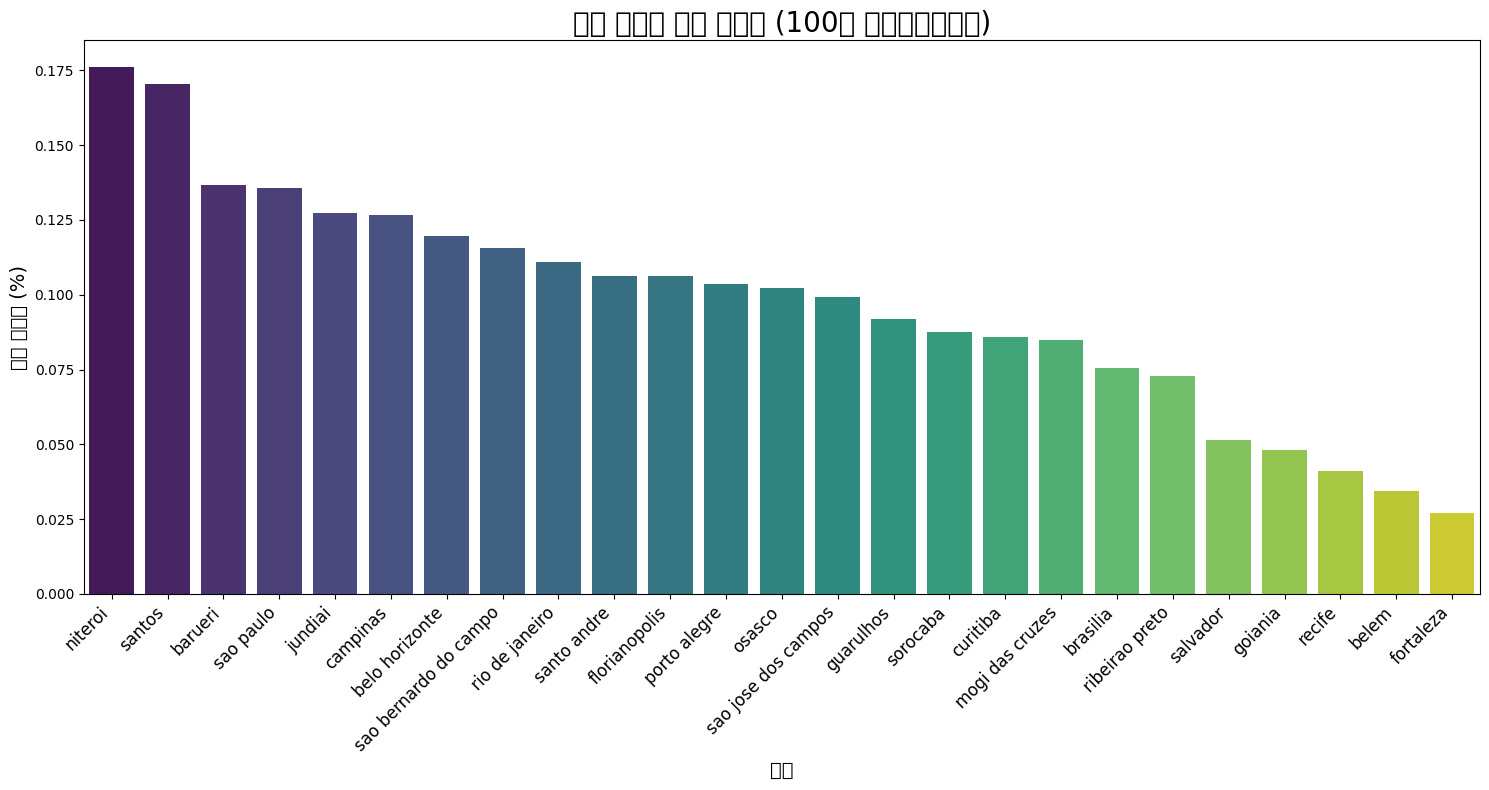

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 침투율을 기준으로 내림차순 정렬된 데이터프레임 (analysis_df_sorted) 사용
plt.figure(figsize=(15, 8)) # 그래프 크기 설정
sns.barplot(x='city', y='customer_penetration_rate', data=analysis_df_sorted, palette='viridis')

plt.title('상위 도시별 고객 침투율 (100개 브라질도시분석)', fontsize=20)
plt.xlabel('도시', fontsize=14)
plt.ylabel('고객 침투율 (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12) # 도시 이름이 겹치지 않게 기울이기
plt.tight_layout() # 레이아웃 자동 조절

plt.show() # 그래프를 화면에 표시

## 그래서 쌍파울로우 가 침투력있는가?  

## 분석결과 

상파울루는 고객 수도, 침투율도 높다: sao paulo의 고객 침투율은 0.135%로, 여전히 높은 편에 속합니다. 이는 단순히 인구만 많은 것이 아니라, 인구 대비 우리 서비스의 고객 비중도 높다는 것을 의미합니다.

'sao bernardo do campo'의 놀라운 침투율: sao bernardo do campo는 인구는 적지만, **고객 침투율이 0.115%**로 상파울루와 비슷한 수준을 보입니다. 이는 이 지역이 인구 규모에 비해 우리 서비스에 대한 관심이 매우 높거나, 특정 마케팅 전략이 효과적으로 작동했을 가능성을 시사합니다.

상대적 효율성 파악: 이처럼 절대적인 고객 수만 보는 것이 아니라, 인구 대비 침투율을 함께 보면 어떤 시장이 더 효율적인지, 어떤 시장이 더 성장 잠재력이 큰지 객관적으로 파악할 수 있습니다.

결론: 상파울루의 고객 수가 많은 이유는 인구 규모가 크고, 동시에 시장 침투율도 높기 때문입니다. 그리고 'sao bernardo do campo' 같은 도시들은 숨겨진 잠재력을 가진 시장이 될 수 있습니다.

## 내부데이터에서 힌트를 찾자

 customer_zip_code_prefix와 customer_state 열을 분석하면 다음과 같은 힌트를 얻기

쌍파울로우 고객 찾기

In [15]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('olist_customers_dataset.csv')

# 도시 이름을 소문자로 통일
df['customer_city'] = df['customer_city'].str.lower()

# 상파울루 고객만 필터링
sao_paulo_customers = df[df['customer_city'] == 'sao paulo']

# 결과 확인 (상위 5개 행)
print("상파울루 고객 데이터:")
print(sao_paulo_customers.head().to_string())

상파울루 고객 데이터:
                         customer_id                customer_unique_id  customer_zip_code_prefix customer_city customer_state
2   4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e                      1151     sao paulo             SP
6   fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177                      4534     sao paulo             SP
13  eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d                      5704     sao paulo             SP
18  9b8ce803689b3562defaad4613ef426f  7f3a72e8f988c6e735ba118d54f47458                      5416     sao paulo             SP
22  2938121a40a20953c43caa8c98787fcb  482441ea6a06b1f72fe9784756c0ea75                      5713     sao paulo             SP




브라질 통계청(IBGE)의 2024년 추정 자료

상파울루 (São Paulo): 21,518,955명

리우데자네이루 (Rio de Janeiro): 12,936,629명

벨루오리존치 (Belo Horizonte): 5,997,565명

브라질리아 (Brasília): 3,000,000명

쿠리치바 (Curitiba): 1,773,718명

캄피나스 (Campinas): 1,064,669명

포르투알레그리 (Porto Alegre): 1,413,094명

살바도르 (Salvador): 2,417,678명

과룰류스 (Guarulhos): 1,299,283명

상베르나르두두캄푸 (São Bernardo do Campo): 810,979명

그룹화 및 집계

In [18]:
# 우편번호 앞자리를 기준으로 고객 수 집계
zip_code_counts = sao_paulo_customers.groupby('customer_zip_code_prefix').size()

# 고객 수가 많은 순서대로 정렬하여 상위 10개 출력
top_zip_codes = zip_code_counts.sort_values(ascending=False).head(10)

print("\n상파울루 내 우편번호별 고객 수 (상위 10개):")
print(top_zip_codes.to_string())


상파울루 내 우편번호별 고객 수 (상위 10개):
customer_zip_code_prefix
8290    36
4140    35
5145    33
4363    32
4571    32
5782    31
3572    31
5017    30
1415    29
1307    29


상파울로우 안에 많이 거주하는곳은 

In [19]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('olist_customers_dataset.csv')

# 도시 이름을 소문자로 통일
df['customer_city'] = df['customer_city'].str.lower()

# 상파울루 고객만 필터링
sao_paulo_customers = df[df['customer_city'] == 'sao paulo']

# 우편번호(prefix)별 고객 수 집계
zip_code_counts = sao_paulo_customers['customer_zip_code_prefix'].value_counts()

# 고객 수가 많은 순서대로 상위 10개 출력
print("상파울루 내 우편번호별 고객 수 (상위 10개):")
print(zip_code_counts.head(10).to_string())

상파울루 내 우편번호별 고객 수 (상위 10개):
customer_zip_code_prefix
8290    36
4140    35
5145    33
4363    32
4571    32
3572    31
5782    31
5017    30
1415    29
1307    29


8290-0000 으로 시작하는 우편번호가 많다는걸 앐수있다.

08290-000 CEP는 상파울루 시 Vila Carmosina 지역의 Rua Victório Santim에 해당합니다 
Código Postal
.

해당 코드의 다양한 경우를 조사한 결과, Itaquera 지역에도 08290-XXX 형태의 CEP (예: 08290-001, 08290-280 등)가 분포해 있음을 알 수 있습니다 
Código Postal
Rua CEP
+1
Guia Mais
.

즉, 8290으로 시작하는 고객 우편번호들은 Itaquera 또는 인접한 Vila Carmosina 지역에 속한다고 보는 것이 정확합니다.

지리적환경 

2. Itaquera 지역 분석 — 지리적 요소와 인프라
교통과 인프라

지하철 노선: 상파울루 메트로 **3-Red Line (Linha 3-Vermelha)**와 CPTM **11-Coral Express (Expresso Leste)**가 통과하는 Estação Corinthians-Itaquera 역이 있습니다 

.

고속도로 접근성:

Avenida Jacu Pêssego (Nova Trabalhadores)

Avenida Itaquera

Avenida Radial Leste

Rua Virginia Ferni 등 주요 도로망이 이웃 지역과의 연결성을 강화합니다 

.

상업 및 사회 기반시설:

쇼핑 센터: Shopping Metrô Itaquera (Corinthians-Itaquera 역 인근)

행정 서비스: Poupatempo 다기능 서비스센터 등

문화시설: Planetário do Carmo (천문관) 


경제·주거 특성

부동산 시장에서는 “Zone de Valor E” 등급으로 분류되어, 상대적으로 중저가 주거지로 평가됩니다 

+1
.

주택 신축 활성 지역으로, 2022년 한 해에만 약 2,000세대 이상의 신규 아파트가 출시된 주요 개발지역 중 하나입니다 

.

거주 밀집 및 주거 특성: 주거단지 (COHAB 등) 중심의 지역이며, José Bonifácio 구역과 경계가 모호해 일부 082 prefix 지역이 혼재되어 있습니다 

.

인접 지역

북쪽: São Miguel Paulista, Vila Jacuí

동쪽: Lajeado

남쪽: José Bonifácio, Cidade Líder, Parque do Carmo

서쪽: Artur Alvim, Ponte Rasa 

.